In [ ]:
!unzip Kodak-20221129T034342Z-001.zip

Archive:  Kodak-20221129T034342Z-001.zip
  inflating: Kodak/kodim23.png       
  inflating: Kodak/kodim21.png       
  inflating: Kodak/kodim22.png       
  inflating: Kodak/kodim20.png       
  inflating: Kodak/kodim24.png       
  inflating: Kodak/kodim18.png       
  inflating: Kodak/kodim19.png       
  inflating: Kodak/kodim16.png       
  inflating: Kodak/kodim06.png       
  inflating: Kodak/kodim09.png       
  inflating: Kodak/kodim08.png       
  inflating: Kodak/kodim02.png       
  inflating: Kodak/kodim15.png       
  inflating: Kodak/kodim17.png       
  inflating: Kodak/kodim11.png       
  inflating: Kodak/kodim10.png       
  inflating: Kodak/kodim14.png       
  inflating: Kodak/kodim13.png       
  inflating: Kodak/kodim12.png       
  inflating: Kodak/kodim04.png       
  inflating: Kodak/kodim03.png       
  inflating: Kodak/kodim05.png       
  inflating: Kodak/kodim07.png       
  inflating: Kodak/kodim01.png       


In [ ]:
!unzip /content/Dataset4K-20221130T231802Z-001.zip

Archive:  /content/Dataset4K-20221130T231802Z-001.zip
replace Dataset4K/4k-3840-x-2160-wallpapers-themefoxx (82).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Dataset4K/4k-3840-x-2160-wallpapers-themefoxx (84).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Dataset4K/4k-3840-x-2160-wallpapers-themefoxx (84).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:

import numpy as np 
import pandas as pd 
import cv2
import scipy
import math
import os, random
from skimage.metrics import structural_similarity
from PIL import Image
from numpy import r_
from scipy import fftpack
from matplotlib import pyplot as plt
from matplotlib.image import imread
%matplotlib inline

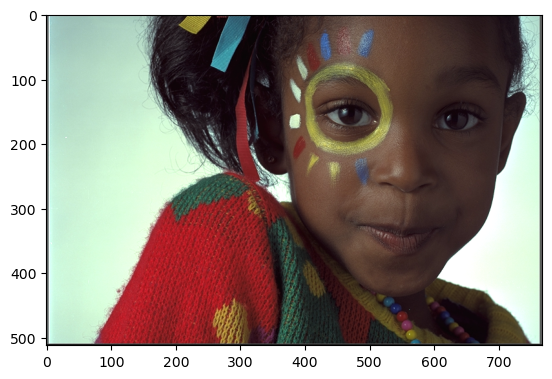

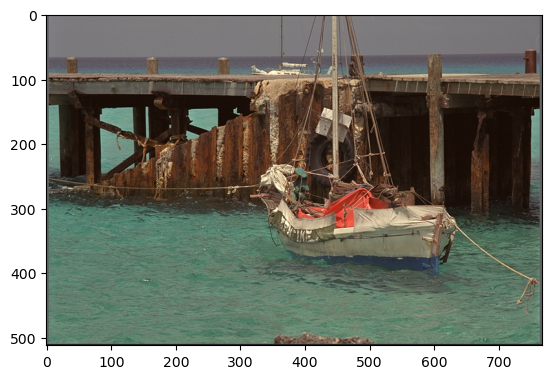

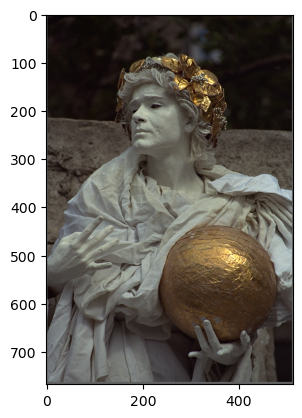

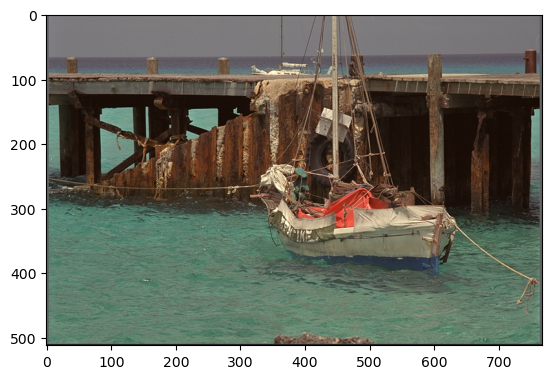

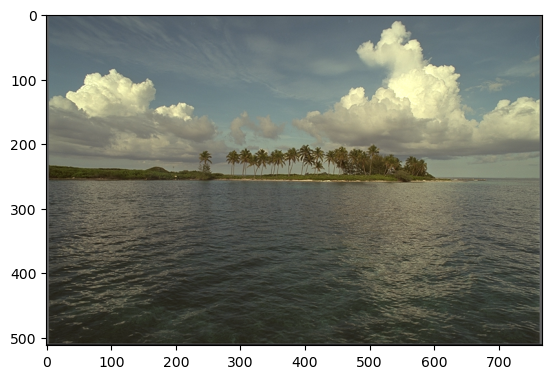

In [9]:
for i in range(5):
  imgPath = os.path.join('Kodak/', np.random.choice((os.listdir("Kodak"))))
  img = Image.open(imgPath)
  f = plt.figure()
  plt.imshow(img)

original image: (2160, 3840, 3)
grayscaled image: (2160, 3840)


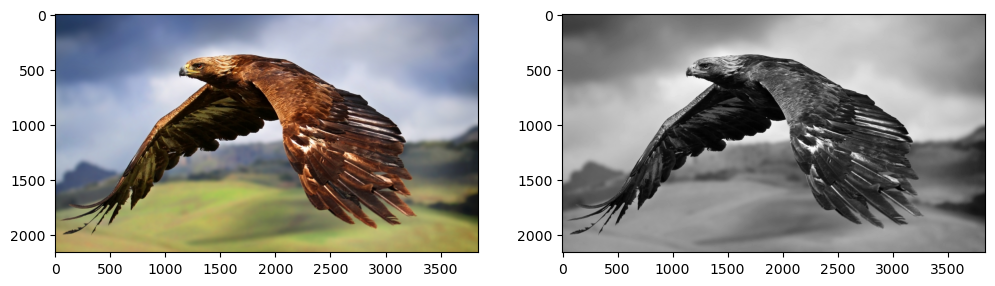

In [10]:
img_path = "Dataset4K/4k-3840-x-2160-wallpapers-themefoxx (1).jpg"
# img = imread(img_path)
im = Image.open(img_path)
im.save('img.png')
img = imread('img.png')
img_gray = np.mean(img, -1)

n_rows, n_cols = img_gray.shape

print(f'original image: {img.shape}')
print(f'grayscaled image: {img_gray.shape}')

fig = plt.figure(0, (12,6))
for idx, im in enumerate([img, img_gray]):
    ax = plt.subplot(1,2, idx+1)

    if len(im.shape)==2:
        ax.imshow(im, cmap='gray')
    else:
        ax.imshow(im)

#SVD Code

In [11]:
def svd(img, full_matrices=False):
    U, S, VT = np.linalg.svd(img, full_matrices=full_matrices)
    return (U, np.diag(S), VT)


# Evaluation Code


In [12]:
def psnr(original, compressed):
    mse = np.mean( (original - compressed) ** 2 )
    if mse == 0:
        return 100 
    PIXEL_MAX = 255.0
    return round((20 * math.log10(PIXEL_MAX / math.sqrt(mse))), 3)

def ssim(original, compressed):
    meanSSIM = structural_similarity(original, compressed, multichannel=True)
    return round(meanSSIM, 3) 

# def perc_storage(rank, n_rows, n_cols):
#     'calculate compresssion ratio in SVD'
#     original_space = n_rows*n_cols
#     compressed_space = n_rows*rank + rank + n_cols*rank
#     return round(compressed_space / original_space * 100,2)
    
# def cr2(original, compressed):
#     nonZerosInOriginal = np.sum(original!=0)
#     nonZerosInCompressed = np.sum(compressed!=0)
#     return round(nonZerosInOriginal/nonZerosInCompressed, 3)
    
def cr(original_img, compressed_img):
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    compressed_img = cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB)

    original_img=cv2.imwrite("original.png", original_img)
    # print("Original File Size: "+str(os.path.getsize("original.png")))
    
    compressed_img=cv2.imwrite("compressed.png", compressed_img)
    # print("Compressed File Size: "+str(os.path.getsize("compressed.png")))

    return round(os.path.getsize("original.png")/os.path.getsize("compressed.png"), 3)
    
# def metrics( original_img, compressed_img ):
#     print("Achieved Peak Signal to Noise Ratio: " + str(psnr(original_img, compressed_img)))
#     print("Achieved SSIM : " + str(ssim(original_img, compressed_img)))
#     print("Achieved Compression Ratio: " + str(cr(original_img, compressed_img)))  
#     print("CR 2 = ", cr2(original_img, compressed_img))
#     return cr(original_img, compressed_img), psnr(original_img, compressed_img), ssim(original_img, compressed_img)

# Grayscale Compression

## Illustration using ranks 5, 25, 50, 100, 250

/var/folders/8v/b9sqvjrn56sfg2w8vhsmpxdw0000gn/T/ipykernel_66964/167496060.py:9: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  meanSSIM = structural_similarity(original, compressed, multichannel=True)


[]

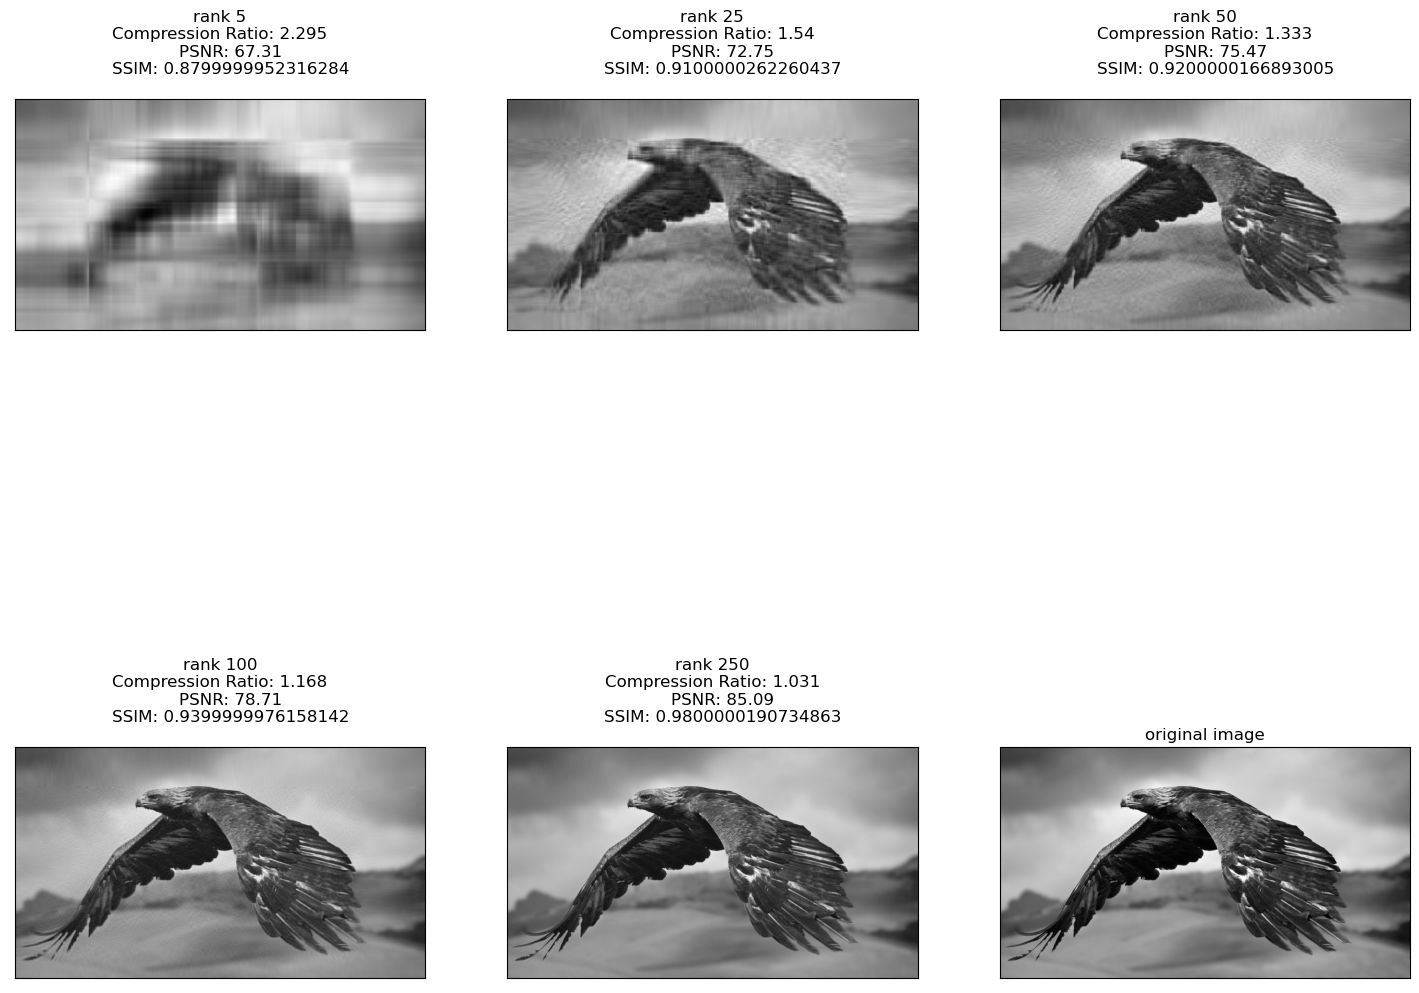

In [13]:
U, S, VT = svd(img_gray)

RANKS = [5, 25, 50, 100, 250]

fig = plt.figure(0, (18, 12))
fig.subplots_adjust(top=1.1)

for idx, r in enumerate(RANKS):
    X_r = U[:, :r] @ S[:r, :r] @ VT[:r, :]

    ax = plt.subplot(2,3, idx+1)
    ax.imshow(X_r, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_title(f'''rank {r}\nCompression Ratio: {cr(img_gray, X_r)}
    PSNR: {round(psnr(img_gray, X_r), 2)}
    SSIM: {round(ssim(img_gray, X_r), 2)}
    ''')
    
ax = plt.subplot(2, 3, idx+2)
ax.imshow(img_gray, cmap='gray')
ax.set_title('original image')
ax.set_xticks([])
ax.set_yticks([])


## Compare performance using different ranks

/var/folders/8v/b9sqvjrn56sfg2w8vhsmpxdw0000gn/T/ipykernel_66964/167496060.py:9: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  meanSSIM = structural_similarity(original, compressed, multichannel=True)


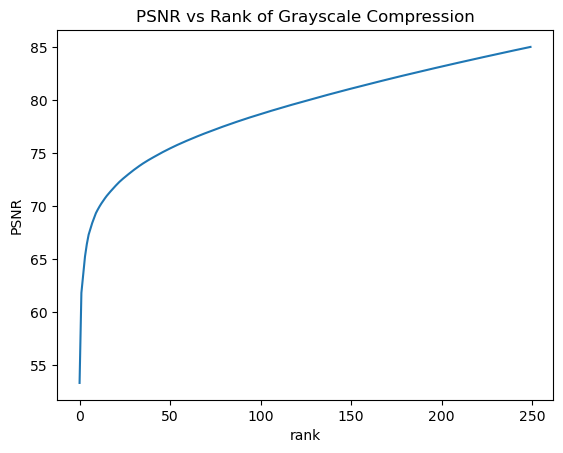

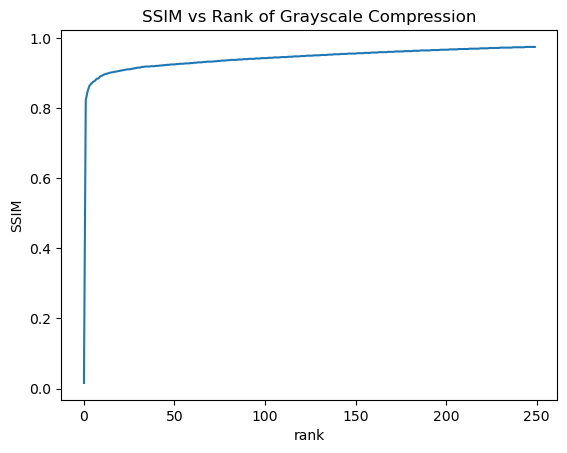

In [14]:
U, S, VT = svd(img_gray)

rank_list = [n for n in range(250)]
X_list = []
psnr_list = []
ssim_list = []
for r in rank_list:
  X_r = U[:, :r] @ S[:r, :r] @ VT[:r, :]
  p = psnr(img_gray, X_r)
  s = ssim(img_gray, X_r)

  X_list.append(X_r)
  psnr_list.append(p)
  ssim_list.append(s)



# plot PSNR vs rank
fig, ax = plt.subplots()
ax.plot(rank_list, psnr_list)
ax.set(xlabel='rank', ylabel='PSNR',
       title='PSNR vs Rank of Grayscale Compression')
plt.savefig('psnr-gray.png')
plt.show()


#plot SSIM vs rank
fig, ax = plt.subplots()
ax.plot(rank_list, ssim_list)
ax.set(xlabel='rank', ylabel='SSIM',
       title='SSIM vs Rank of Grayscale Compression')
plt.savefig('ssim-gray.png')
plt.show()



# Color Compression

## Illustration using ranks 5, 25, 50, 100, 250

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/var/folders/8v/b9sqvjrn56sfg2w8vhsmpxdw0000gn/T/ipykernel_66964/167496060.py:9: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  meanSSIM = structural_similarity(original, compressed, multichannel=True)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


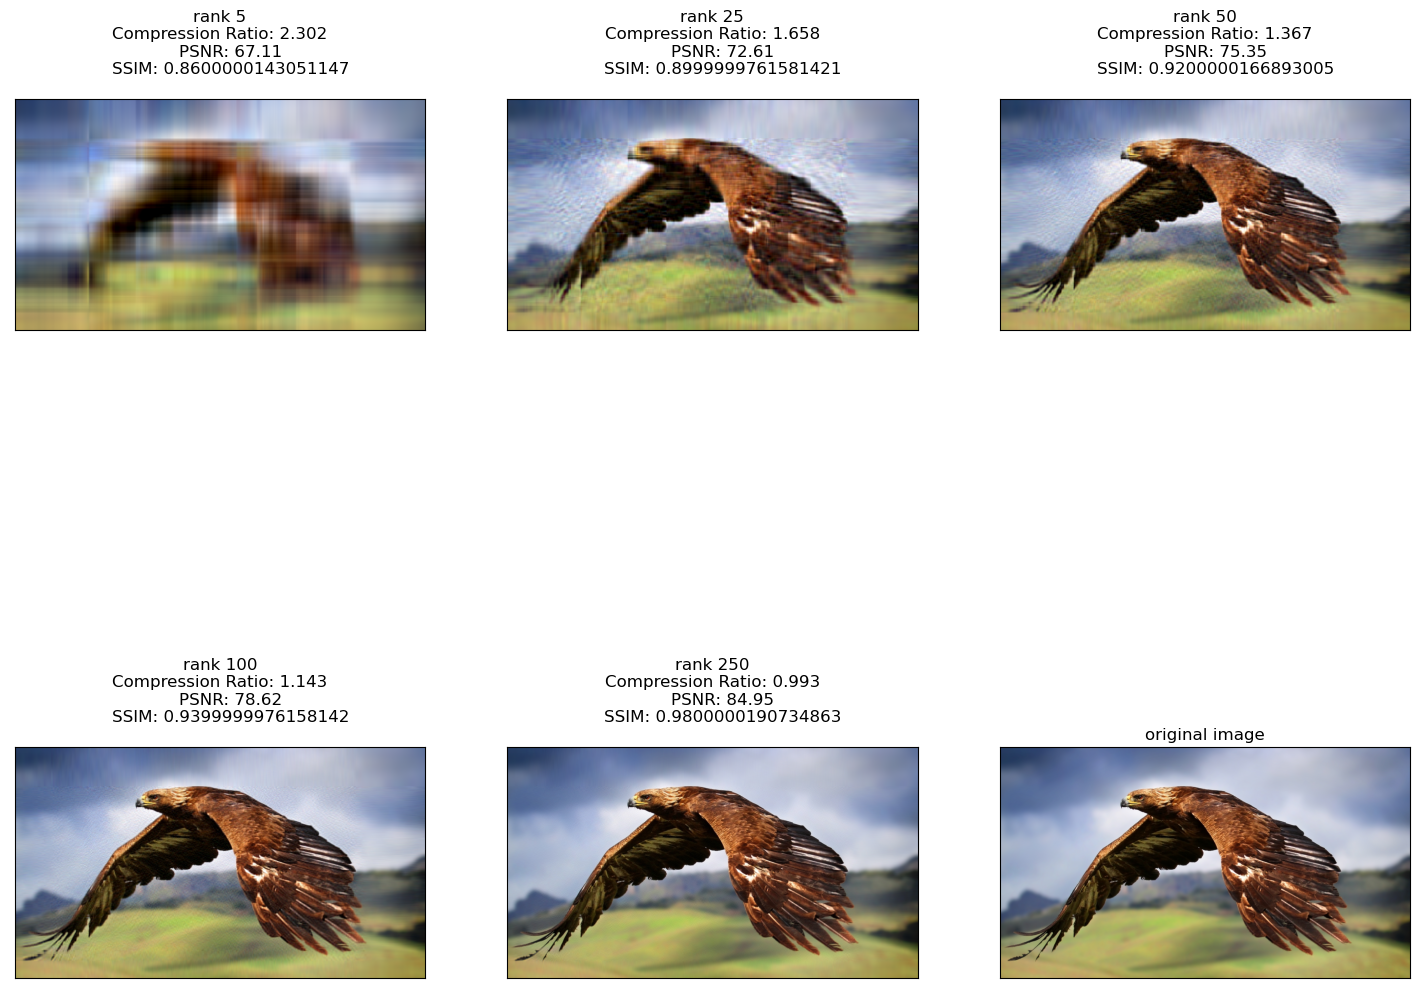

In [15]:
RANKS = [5, 25, 50, 100, 250]

red_channel, green_channel, blue_channel =  img[:, :, 0], img[:, :, 1], img[:, :, 2]

U_B, S_B, VT_B = svd(blue_channel)
U_G, S_G, VT_G = svd(green_channel)
U_R, S_R, VT_R = svd(red_channel)
    
fig = plt.figure(0, (18, 12))
fig.subplots_adjust(top=1.1)

for idx, r in enumerate(RANKS):
    XR_r = U_R[:, :r] @ S_R[:r, :r] @ VT_R[:r, :]
    XG_r = U_G[:, :r] @ S_G[:r, :r] @ VT_G[:r, :]
    XB_r = U_B[:, :r] @ S_B[:r, :r] @ VT_B[:r, :]

    X_r = np.dstack((XR_r, XG_r, XB_r))
    

    ax = plt.subplot(2,3, idx+1)
    ax.imshow(X_r)
    ax.set_xticks([])
    ax.set_yticks([])
        
    ax.set_title(f'''rank {r}\nCompression Ratio: {cr(img, X_r)}
    PSNR: {round(psnr(img, X_r), 2)}
    SSIM: {round(ssim(img, X_r), 2)}
    ''')
    
ax = plt.subplot(2, 3, idx+2)
ax.imshow(img)
ax.set_title('original image')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('color-stack.png')

## Compare performance using different ranks

/var/folders/8v/b9sqvjrn56sfg2w8vhsmpxdw0000gn/T/ipykernel_66964/167496060.py:9: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  meanSSIM = structural_similarity(original, compressed, multichannel=True)


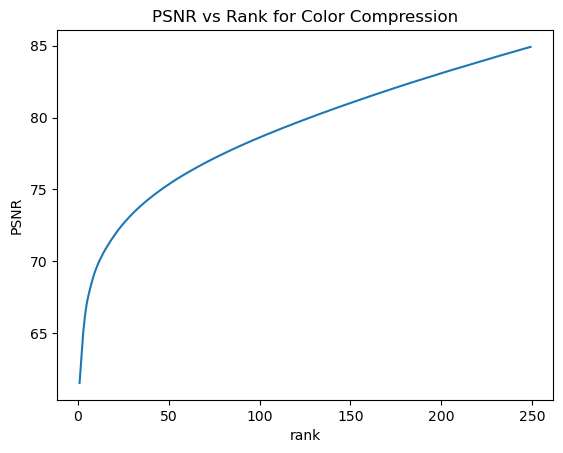

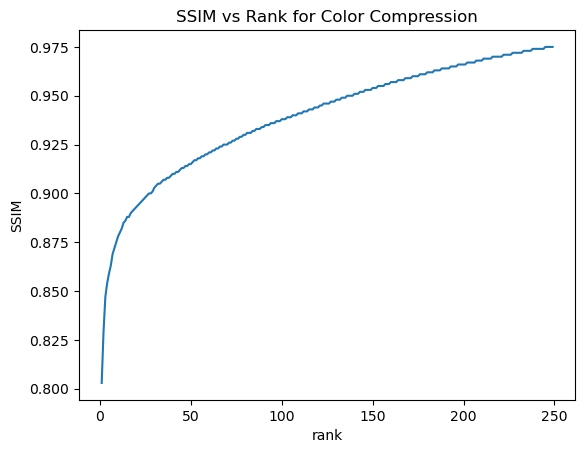

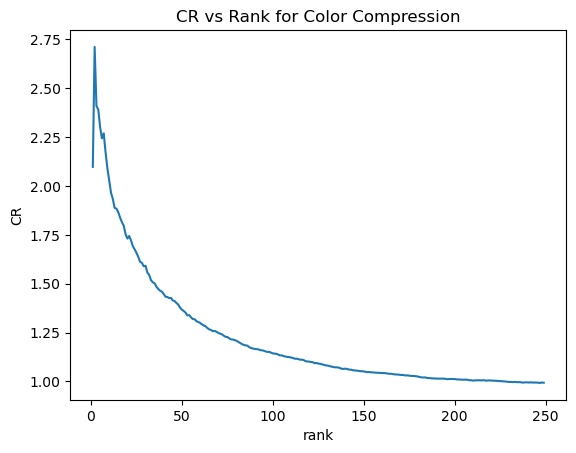

In [16]:
rank_list = [n for n in range(1, 250)]
psnr_list = []
ssim_list = []
cr_list = []

red_channel, green_channel, blue_channel =  img[:, :, 0], img[:, :, 1], img[:, :, 2]

U_B, S_B, VT_B = svd(blue_channel)
U_G, S_G, VT_G = svd(green_channel)
U_R, S_R, VT_R = svd(red_channel)

for r in (rank_list):
    XR_r = U_R[:, :r] @ S_R[:r, :r] @ VT_R[:r, :]
    XG_r = U_G[:, :r] @ S_G[:r, :r] @ VT_G[:r, :]
    XB_r = U_B[:, :r] @ S_B[:r, :r] @ VT_B[:r, :]

    X_r = np.dstack((XR_r, XG_r, XB_r))

    p = psnr(img, X_r)
    s = ssim(img, X_r)
    c = cr(img, X_r)

    psnr_list.append(p)
    ssim_list.append(s)
    cr_list.append(c)



# plot PSNR vs rank
fig, ax = plt.subplots()
ax.plot(rank_list, psnr_list)
ax.set(xlabel='rank', ylabel='PSNR',
       title='PSNR vs Rank for Color Compression')
plt.savefig('psnr-color.png')
plt.show()


#plot SSIM vs rank
fig, ax = plt.subplots()
ax.plot(rank_list, ssim_list)
ax.set(xlabel='rank', ylabel='SSIM',
       title='SSIM vs Rank for Color Compression')
plt.savefig('ssim-color.png')
plt.show()


#plot CR vs rank
fig, ax = plt.subplots()
ax.plot(rank_list, cr_list)
ax.set(xlabel='rank', ylabel='CR',
       title='CR vs Rank for Color Compression')
plt.savefig('cr-color.png')
plt.show()

In [17]:
print(cr_list)

[2.098, 2.712, 2.41, 2.391, 2.302, 2.244, 2.27, 2.174, 2.091, 2.03, 1.965, 1.934, 1.888, 1.884, 1.866, 1.838, 1.815, 1.797, 1.754, 1.731, 1.744, 1.722, 1.692, 1.676, 1.658, 1.637, 1.612, 1.607, 1.589, 1.592, 1.557, 1.545, 1.518, 1.507, 1.502, 1.484, 1.473, 1.464, 1.459, 1.447, 1.433, 1.432, 1.426, 1.427, 1.414, 1.411, 1.401, 1.393, 1.377, 1.367, 1.36, 1.352, 1.338, 1.339, 1.328, 1.319, 1.318, 1.308, 1.304, 1.299, 1.292, 1.286, 1.282, 1.273, 1.266, 1.263, 1.257, 1.258, 1.254, 1.248, 1.244, 1.241, 1.234, 1.228, 1.227, 1.22, 1.215, 1.214, 1.211, 1.208, 1.202, 1.197, 1.191, 1.187, 1.184, 1.183, 1.175, 1.171, 1.168, 1.166, 1.165, 1.164, 1.16, 1.159, 1.157, 1.153, 1.151, 1.151, 1.147, 1.143, 1.142, 1.141, 1.137, 1.133, 1.133, 1.129, 1.127, 1.125, 1.124, 1.122, 1.12, 1.116, 1.116, 1.114, 1.111, 1.111, 1.109, 1.103, 1.102, 1.101, 1.099, 1.098, 1.093, 1.094, 1.091, 1.09, 1.087, 1.085, 1.082, 1.081, 1.079, 1.076, 1.074, 1.072, 1.072, 1.071, 1.068, 1.064, 1.064, 1.065, 1.063, 1.06, 1.06, 1.057, 1

# Evaluate on whole dataset

In [19]:
from skimage.util import img_as_bool
import time
folderName = 'Kodak'
# folderName = 'Dataset4K'


# RANKS = [n for n in range(250)]
RANKS = [10, 50, 100, 200, 250]
# r = RANKS

final_metrics = {}

for r in RANKS:

    CR_LIST = []
    PSNR_LIST = []
    SSIM_LIST = []
    time_list = []
    
    for fileName in (os.listdir(folderName)):
        imagePath = os.path.join(folderName, fileName)
        img = imread(imagePath)

        red_channel, green_channel, blue_channel =  img[:, :, 0], img[:, :, 1], img[:, :, 2]

        start_time = time.time()

        U_B, S_B, VT_B = svd(blue_channel)
        U_G, S_G, VT_G = svd(green_channel)
        U_R, S_R, VT_R = svd(red_channel)

        end_time = time.time()

        
        XR_r = U_R[:, :r] @ S_R[:r, :r] @ VT_R[:r, :]
        XG_r = U_G[:, :r] @ S_G[:r, :r] @ VT_G[:r, :]
        XB_r = U_B[:, :r] @ S_B[:r, :r] @ VT_B[:r, :]

        X_r = np.dstack((XR_r, XG_r, XB_r))

        p = psnr(img, X_r)
        s = ssim(img, X_r)
        c = cr(img, X_r)

        CR_LIST.append(c)
        PSNR_LIST.append(p)
        SSIM_LIST.append(s)
        time_list.append(end_time-start_time)

    final_metrics[r] = {'cr':CR_LIST, 'psnr': PSNR_LIST, 'ssim': SSIM_LIST, 'time': time_list}

/var/folders/8v/b9sqvjrn56sfg2w8vhsmpxdw0000gn/T/ipykernel_66964/167496060.py:9: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  meanSSIM = structural_similarity(original, compressed, multichannel=True)


In [21]:
def display_avg_results(results):
    for rank, values in results.items():
        print(f'For rank: {rank: }:')
        print(f'mean CR: {np.mean(values["cr"])}')
        print(f'mean PSNR: {np.mean(values["psnr"])}')
        print(f'mean SSIM: {np.mean(values["ssim"])}')
        print(f'avg time: {np.mean(values["time"])}')
        print('\n..........................\n')

In [22]:
display_avg_results(final_metrics)

For rank:  10:
mean CR: 1.8915
mean PSNR: 70.99958333333332
mean SSIM: 0.7286249995231628
avg time: 0.7477900087833405

..........................

For rank:  50:
mean CR: 1.26575
mean PSNR: 76.12783333333333
mean SSIM: 0.8535833358764648
avg time: 0.8791131178538004

..........................

For rank:  100:
mean CR: 1.1064999999999998
mean PSNR: 79.69466666666666
mean SSIM: 0.919041633605957
avg time: 0.5343340039253235

..........................

For rank:  200:
mean CR: 1.0235
mean PSNR: 85.80179166666669
mean SSIM: 0.9736250042915344
avg time: 0.503228892882665

..........................

For rank:  250:
mean CR: 1.013375
mean PSNR: 88.89816666666667
mean SSIM: 0.9857084155082703
avg time: 0.6467219293117523

..........................



# 4K

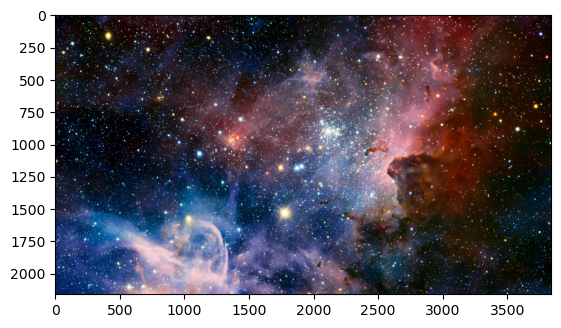

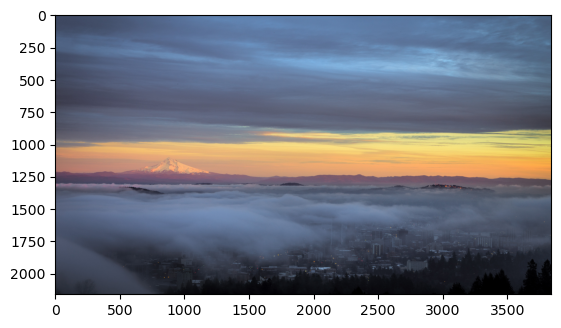

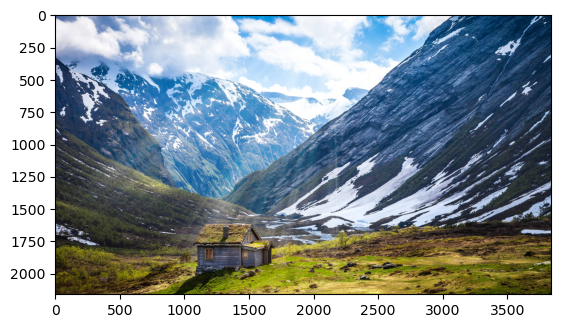

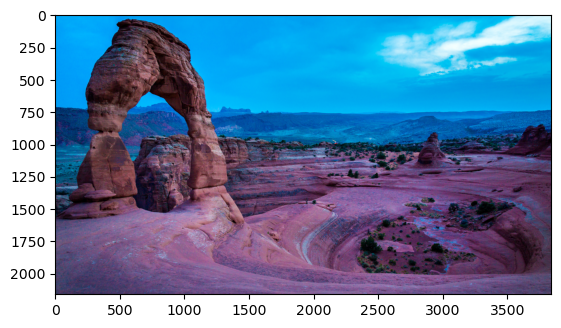

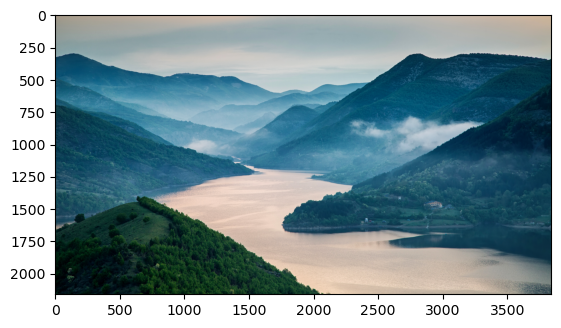

In [23]:
for i in range(5):
  imgPath = os.path.join('Dataset4K', np.random.choice((os.listdir("Dataset4K"))))
  img = Image.open(imgPath)
  f = plt.figure()
  plt.imshow(img)

In [26]:
import time
from tqdm.notebook import tqdm
# folderName = 'Kodak'
folderName = 'Dataset4K'
CR_LIST = []
PSNR_LIST = []
SSIM_LIST = []

# RANKS = [n for n in range(250)]
# RANKS = [10, 50, 100, 200, 250]
# r = 50
RANKS = [50]
final_metrics4k = {}

for r in RANKS:
    CR_LIST = []
    PSNR_LIST = []
    SSIM_LIST = []
    time_list = []

    counter=0

    for fileName in tqdm(os.listdir(folderName)):
        imagePath = os.path.join(folderName, fileName)
        img = imread(imagePath)
        img = np.float32(img)

        red_channel, green_channel, blue_channel =  img[:, :, 0], img[:, :, 1], img[:, :, 2]

        start_time = time.time()

        U_B, S_B, VT_B = svd(blue_channel)
        U_G, S_G, VT_G = svd(green_channel)
        U_R, S_R, VT_R = svd(red_channel)

        end_time = time.time()

        
        XR_r = U_R[:, :r] @ S_R[:r, :r] @ VT_R[:r, :]
        XG_r = U_G[:, :r] @ S_G[:r, :r] @ VT_G[:r, :]
        XB_r = U_B[:, :r] @ S_B[:r, :r] @ VT_B[:r, :]

        X_r = np.dstack((XR_r, XG_r, XB_r))

        p = psnr(img, X_r)
        s = ssim(img, X_r)
        c = cr(img, X_r)

            
        end_time = time.time()
        CR_LIST.append(c)
        PSNR_LIST.append(p)
        SSIM_LIST.append(s)
        time_list.append(end_time-start_time)

        counter+=1
        if counter >=100:
            break

    final_metrics4k[r] = {'cr':CR_LIST, 'psnr': PSNR_LIST, 'ssim': SSIM_LIST, 'time': time_list}

  0%|          | 0/2058 [00:00<?, ?it/s]

/var/folders/8v/b9sqvjrn56sfg2w8vhsmpxdw0000gn/T/ipykernel_66964/167496060.py:9: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  meanSSIM = structural_similarity(original, compressed, multichannel=True)


In [28]:
final_metrics4k

{50: {'cr': [1.853,
   1.103,
   1.373,
   1.156,
   1.156,
   1.684,
   1.371,
   1.134,
   1.21,
   1.41,
   1.087,
   1.393,
   1.28,
   1.707,
   1.271,
   1.127,
   1.066,
   1.302,
   1.996,
   1.234,
   1.202,
   1.236,
   1.285,
   0.971,
   0.884,
   0.983,
   1.803,
   1.567,
   1.296,
   1.242,
   1.081,
   1.144,
   1.432,
   1.404,
   1.781,
   1.286,
   1.382,
   1.221,
   1.273,
   1.153,
   2.047,
   1.535,
   1.201,
   1.469,
   1.195,
   1.273,
   1.408,
   1.51,
   1.214,
   1.433,
   1.265,
   0.914,
   1.381,
   0.971,
   1.162,
   1.399,
   1.457,
   1.158,
   1.126,
   1.32,
   0.93,
   1.049,
   1.268,
   1.195,
   1.158,
   1.071,
   1.376,
   1.417,
   1.156,
   1.566,
   1.339,
   0.911,
   1.02,
   1.14,
   1.144,
   1.455,
   1.535,
   1.819,
   1.401,
   1.119,
   1.03,
   1.089,
   1.141,
   1.14,
   1.46,
   1.462,
   1.168,
   1.243,
   1.083,
   1.218,
   1.22,
   1.149,
   1.573,
   1.496,
   1.223,
   1.184,
   0.877,
   1.286,
   1.729,
   1.095],
 

In [27]:
display_avg_results(final_metrics4k)

For rank:  50:
mean CR: 1.28912
mean PSNR: 25.15874
mean SSIM: 0.19517001509666443
avg time: 42.122334811687466

..........................

